In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
pathlistings = '/content/gdrive/My Drive/BT4222 project/afterfeatureengineering2.csv'
df_listings_dummy = pd.read_csv(pathlistings)
len(df_listings_dummy)

99990

In [5]:
X = df_listings_dummy.drop(columns=['price'])
y = df_listings_dummy.price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(74992, 324)
(24998, 324)


In [0]:
gbrt1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8) 
gbrt1.fit(X_train, y_train)
y_train_pred1 = gbrt1.predict(X_train)
y_test_pred1 = gbrt1.predict(X_test)


In [16]:
print("training RMSE: ", mean_squared_error(y_train, y_train_pred1, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred1))
print("testing RMSE: ", mean_squared_error(y_test, y_test_pred1, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred1))

training RMSE:  57.70122265851112
training R2:  0.9507487032785497
testing RMSE:  155.78707915695608
testing R2:  0.5460282039269532


In [18]:
pd.DataFrame({'feature':X.columns, 'importance':gbrt1.feature_importances_}).sort_values(by='importance', ascending=False).head(20)

,feature,importance
21,accommodates,0.077214
23,bathrooms,0.070237
57,sentiment_avg,0.069224
8,High Line,0.050333
22,availability_365,0.039735
26,cleaning_fee,0.033522
181,neighbourhood_Lower East Side,0.032579
13,American Museum of Natural History,0.032528
4,Rockefeller Centre,0.032363
36,maximum_nights,0.027888


In [20]:
importance = pd.DataFrame({'feature':X.columns, 'importance':gbrt1.feature_importances_}).sort_values(by='importance', ascending=False).head(20)
importance.index = range(20)
importance

,feature,importance
0,accommodates,0.077214
1,bathrooms,0.070237
2,sentiment_avg,0.069224
3,High Line,0.050333
4,availability_365,0.039735
5,cleaning_fee,0.033522
6,neighbourhood_Lower East Side,0.032579
7,American Museum of Natural History,0.032528
8,Rockefeller Centre,0.032363
9,maximum_nights,0.027888


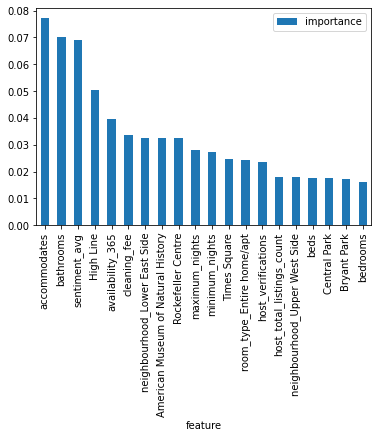

In [21]:
import matplotlib.pyplot as plt
importance.plot(kind='bar',x='feature',y='importance')

In [0]:
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, max_depth=8) 
gbrt.fit(X_train, y_train)
y_train_pred = gbrt.predict(X_train)
y_test_pred = gbrt.predict(X_test)


In [23]:
print("training RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred))
print("testing RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred))

training RMSE:  61.097859652980226
training R2:  0.9447795894717586
testing RMSE:  155.487490024317
testing R2:  0.5477725622385912


In [24]:
gbrt2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, max_depth=9) 
gbrt2.fit(X_train, y_train)
y_train_pred2 = gbrt2.predict(X_train)
y_test_pred2 = gbrt2.predict(X_test)
print("training RMSE: ", mean_squared_error(y_train, y_train_pred2, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred2))
print("testing RMSE: ", mean_squared_error(y_test, y_test_pred2, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred2))

training RMSE:  49.58244587402193
training R2:  0.9636333304035105
testing RMSE:  155.65576301333192
testing R2:  0.5467932057619584


In [29]:
gbrt2 = GradientBoostingRegressor(n_estimators=150, learning_rate=0.08, max_depth=9) 
gbrt2.fit(X_train, y_train)
y_train_pred2 = gbrt2.predict(X_train)
y_test_pred2 = gbrt2.predict(X_test)
print("training RMSE: ", mean_squared_error(y_train, y_train_pred2, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred2))
print("testing RMSE: ", mean_squared_error(y_test, y_test_pred2, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred2))

training RMSE:  45.28167937150739
training R2:  0.9696685837949959
testing RMSE:  155.59875737517947
testing R2:  0.5471250998235215


In [27]:
gbrt3 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.08, max_depth=9) 
gbrt3.fit(X_train, y_train)
y_train_pred3 = gbrt3.predict(X_train)
y_test_pred3 = gbrt3.predict(X_test)
print("training RMSE: ", mean_squared_error(y_train, y_train_pred3, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred3))
print("testing RMSE: ", mean_squared_error(y_test, y_test_pred3, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred3))

training RMSE:  41.77578706568258
training R2:  0.9741835263944879
testing RMSE:  154.84232197804442
testing R2:  0.5515176530289432


In [30]:
importance3 = pd.DataFrame({'feature':X.columns, 'importance':gbrt3.feature_importances_}).sort_values(by='importance', ascending=False).head(20)
importance3.index = range(20)
importance3

,feature,importance
0,accommodates,0.071207
1,bathrooms,0.067532
2,sentiment_avg,0.063177
3,High Line,0.048638
4,Rockaway Beach,0.039157
5,neighbourhood_Lower East Side,0.037472
6,availability_365,0.033774
7,cleaning_fee,0.032386
8,host_total_listings_count,0.030655
9,Grand Central Terminal,0.027615
